<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #CC99FF;
    border-left: 10px solid white;
    border-right: 10px solid white;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Domestic Violence Against Women
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/domestic-violence-against-women/Domestic violence.csv


In [2]:
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Project. Domestic Violence Against Women
## Goal
> ## EDA : Column Correlation Analysis
> ## Modeling :  Predicting Violence

In [3]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.inspection import permutation_importance
import itertools

# For Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For Deep learning
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_csv('/kaggle/input/domestic-violence-against-women/Domestic violence.csv')
df

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes
...,...,...,...,...,...,...,...
342,343,27,tertiary,semi employed,30000,unmarred,no
343,344,26,tertiary,employed,35000,married,no
344,345,27,primary,unemployed,0,married,yes
345,346,29,primary,unemployed,0,married,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SL. No           347 non-null    int64 
 1   Age              347 non-null    int64 
 2   Education        347 non-null    object
 3   Employment       347 non-null    object
 4   Income           347 non-null    int64 
 5   Marital status   347 non-null    object
 6   Violence         347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL. No,347.0,174.000000,100.314505,1.0,87.5,174.0,260.5,347.0
Age,347.0,31.380403,9.601569,15.0,23.0,30.0,39.5,60.0
Income,347.0,2110.685879,5743.278766,0.0,0.0,0.0,0.0,35000.0


# EDA : Column Analysis

In [7]:
col_name_object = df.select_dtypes(include='object').columns.tolist()
col_name_num = df.select_dtypes(include=['float64','int64']).columns.tolist()

for col in col_name_object:
    print(f"Column '{col}' unquie values: {df[col].unique()}")

Column 'Education ' unquie values: ['secondary' 'tertiary' 'primary' 'none']
Column 'Employment ' unquie values: ['unemployed' 'semi employed' 'employed' 'employed ']
Column 'Marital status ' unquie values: ['married' 'unmarred']
Column 'Violence ' unquie values: ['yes' 'no']


In [8]:
col_name_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

fig = go.Figure()

for col in col_name_num:
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[col], name=col))

    fig.update_layout(
        title=f"Box Plot for {col}",
        yaxis_title="Values",
        title_font_size=25,
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white')
    )

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

    fig.show()

In [9]:
fig = px.histogram(df, x='Age', color='Violence ', nbins=20)
fig.update_layout(
    title='Age Distribution by Violence',
    xaxis_title='Age',
    yaxis_title='Frequency',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.show()

In [10]:
fig = px.histogram(df, x='Education ', color='Violence ', barmode='group')
fig.update_layout(
    title='Education Level Distribution by Violence',
    xaxis_title='Education Level',
    yaxis_title='Count',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.show()

In [11]:
fig = px.box(df, x='Employment ', y='Income', color='Violence ')
fig.update_layout(
    title='Income by Employment Status and Violence',
    xaxis_title='Employment Status',
    yaxis_title='Income',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.show()

In [12]:
fig = px.histogram(df, x='Marital status ', color='Violence ', barmode='group')
fig.update_layout(
    title='Marital Status Distribution by Violence',
    xaxis_title='Marital Status',
    yaxis_title='Count',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.show()

In [13]:
fig = px.scatter(df, x='Age', y='Income', color='Violence ', size='Income', trendline='ols')
fig.update_layout(
    title='Age vs. Income by Violence',
    xaxis_title='Age',
    yaxis_title='Income',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.show()

# EDA : Column Correlation Analysis

In [14]:
X = df.drop(columns=['Violence ','SL. No'])
y = df['Violence ']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_encoded.columns

print("Feature Coefficients:")
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef:.5f}")

Feature Coefficients:
Age: 0.03696
Income: -0.00024
Education _none: -0.45022
Education _primary: 0.02101
Education _secondary: -0.24155
Education _tertiary: -0.23436
Employment _employed: 0.36989
Employment _employed : -0.00037
Employment _semi employed: -0.39347
Employment _unemployed: -0.88116
Marital status _married: -0.11975
Marital status _unmarred: -0.78536


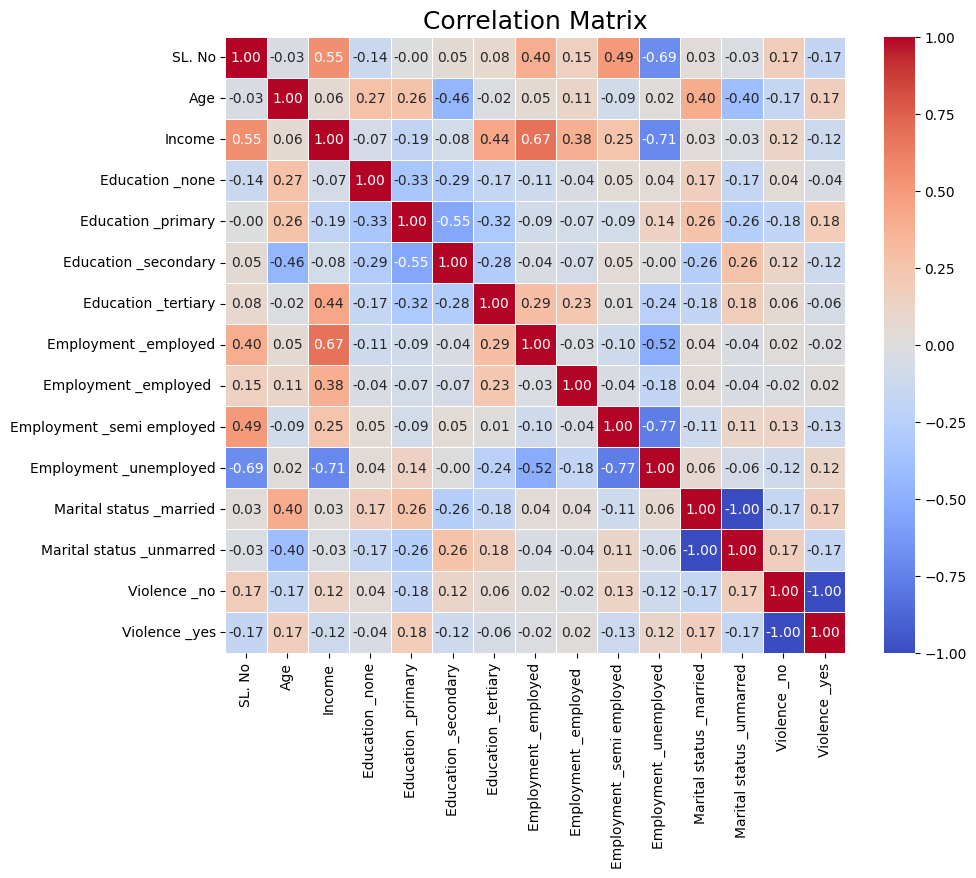

In [15]:
df_encoded = pd.get_dummies(df)
correlation_matrix = df_encoded.corr().round(3)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black')

plt.show()

# Machine learning

In [16]:
def evaluate_models(X, y):

    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    encoder = OneHotEncoder(drop='first', sparse=False)
    X_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))

    scaler = StandardScaler()
    X_numerical = pd.DataFrame(scaler.fit_transform(X[numerical_columns]))

    X_processed = pd.concat([X_categorical, X_numerical], axis=1)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),   
        ('Decision Tree Classifier', DecisionTreeClassifier()),
        ('Random Forest Classifier', RandomForestClassifier()),
        ('Support Vector Classifier', SVC()),
        ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
        ('XGBoost Classifier', XGBClassifier()),
        ('LightGBM Classifier', LGBMClassifier())
    ]

    results = {}
    for name, model in models:
        pipeline = Pipeline([('scaler', StandardScaler()), (name, model)])
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

    results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
    results_df.rename(columns={'index': 'Model'}, inplace=True)

    return results_df

In [17]:
evaluate_models(X, y)

[LightGBM] [Info] Number of positive: 68, number of negative: 209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 277, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245487 -> initscore=-1.122827
[LightGBM] [Info] Start training from score -1.122827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.742857,0.551837,0.742857,0.633255
1,Decision Tree Classifier,0.728571,0.696060,0.728571,0.704371
2,Random Forest Classifier,0.742857,0.717734,0.742857,0.724156
3,Support Vector Classifier,0.742857,0.551837,0.742857,0.633255
4,K-Nearest Neighbors Classifier,0.757143,0.724717,0.757143,0.715329
5,XGBoost Classifier,0.757143,0.724717,0.757143,0.715329
6,LightGBM Classifier,0.771429,0.751786,0.771429,0.726108


# Deep learning

In [18]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

onehot_encoder = OneHotEncoder()
X_encoded = onehot_encoder.fit_transform(X[categorical_columns])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()
X_numerical = X[numerical_columns].values

X_processed = pd.concat([pd.DataFrame(X_encoded.toarray()), pd.DataFrame(X_numerical)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> # 1. ANN (Artificial Neural Network)

In [19]:
model_ANN = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history = model_ANN.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.4375 - loss: 0.7221

I0000 00:00:1719463328.895646      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 573ms/step - accuracy: 0.5656 - loss: 0.6545 - val_accuracy: 0.7143 - val_loss: 0.6069
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7130 - loss: 0.5717 - val_accuracy: 0.7321 - val_loss: 0.5930
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6991 - loss: 0.5786 - val_accuracy: 0.6964 - val_loss: 0.5858
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7068 - loss: 0.6000 - val_accuracy: 0.6964 - val_loss: 0.5833
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6785 - loss: 0.5946 - val_accuracy: 0.6964 - val_loss: 0.5830
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7368 - loss: 0.5858 - val_accuracy: 0.6964 - val_loss: 0.5838
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7639 - loss: 0.5378 - val_accuracy: 0.6964 - val_loss: 0.5858
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7187 - loss: 0.5394 - val_accuracy: 0.6964 - val_loss: 0.5886
Epoch 9/10

In [20]:
y_pred = (model_ANN.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
              precision    recall  f1-score   support

          No       0.74      1.00      0.85        52
         Yes       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70



> # 2. RNN (Recurrent Neural Network)

In [21]:
X_train_rnn = pad_sequences(X_train.values, maxlen=10)
X_test_rnn = pad_sequences(X_test.values, maxlen=10)

model_RNN = Sequential([
    Embedding(input_dim=10, output_dim=64),
    SimpleRNN(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_RNN.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.5158 - loss: 0.6971 - val_accuracy: 0.7429 - val_loss: 0.6657
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7334 - loss: 0.6551 - val_accuracy: 0.7429 - val_loss: 0.6372
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7402 - loss: 0.6198 - val_accuracy: 0.7429 - val_loss: 0.6074
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7435 - loss: 0.5925 - val_accuracy: 0.7429 - val_loss: 0.5970
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7084 - loss: 0.6271 - val_accuracy: 0.7429 - val_loss: 0.5857
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7468 - loss: 0.5712 - val_accuracy: 0.7429 - val_loss: 0.5767
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7403 - loss: 0.5723 - val_accuracy: 0.7429 - val_loss: 0.5689
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7729 - loss: 0.5313 - val_accuracy: 0.7429 - val_loss: 0.5597
Epoch 

In [22]:
y_pred = model_RNN.predict(X_test_rnn)
y_pred_binary = (y_pred > 0.5).astype(int)  

print(classification_report(y_test, y_pred_binary, target_names=['No', 'Yes'], zero_division=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
              precision    recall  f1-score   support

          No       0.74      1.00      0.85        52
         Yes       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70



> # 3. LSTM (Long Short-Term Memory)

In [23]:
X_train_array = X_train.values
X_test_array = X_test.values

X_train_lstm = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_lstm = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))


model_LSTM = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), 
    LSTM(64, activation='relu'), 
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_LSTM.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 512ms/step - accuracy: 0.5398 - loss: 20.3479 - val_accuracy: 0.7429 - val_loss: 8.9108
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5949 - loss: 21.0270 - val_accuracy: 0.7429 - val_loss: 24.6001
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - loss: 31.1060 - val_accuracy: 0.7429 - val_loss: 35.6805
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss: 9.0955 - val_accuracy: 0.7429 - val_loss: 41.8887
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 26.8009 - val_accuracy: 0.7429 - val_loss: 43.7775
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6796 - loss: 12.3432 - val_accuracy: 0.7429 - val_loss: 48.9136
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7475 - loss: 12.8433 - val_accuracy: 0.7429 - val_loss: 52.6793
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7220 - loss: 7.4904 - val_accuracy: 0.7429 - val_loss: 5

In [24]:
y_pred = model_LSTM.predict(X_test_lstm)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary, target_names=['No', 'Yes'], zero_division=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
              precision    recall  f1-score   support

          No       0.74      1.00      0.85        52
         Yes       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70



# Thanks